In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary = pd.DataFrame()

probs=[
       "MaF01", "MaF02", "MaF03", "MaF04", "MaF05", "MaF06", "MaF07", "MaF08", "MaF09", 
       "MaF10", "MaF11", "MaF12", "MaF13", "MaF14", "MaF15"
      ]

alg="HHCOR2"

for m in [5, 10, 15]:
    for prob in probs:
        path="../MaFMethodology/%s/full/%s/%s/output/"%(m, alg, prob)
        runs = [str(i) for i in range(0, 20)]
        algs=["SPEA2","MOEAD","NSGAII","MOEADD","MOMBI2","NSGAIII","ThetaDEA","SPEA2SDE","HypE"]
        df_list=[]
        for run in runs:
            df = pd.read_csv(path+"selected."+run, names=["Selected"])
            df['it'] = np.arange(len(df))
            df['run'] = run
            df_list.append(df)
        maxit = df.max()['it']

        df = pd.concat(df_list)
        df = df.groupby(['Selected', 'it']).size()
        df = df.to_frame(name = 'count').reset_index()
        df['count'] = df['count'] / 20 # divided by 20 independent runs
        df['countnorm'] = df['count'] / maxit # divided by max iterations
        df['cumcount'] = df.groupby(['Selected'])['countnorm'].cumsum()    
        df['prob'] = "%s(%s)"%(prob, m)


        for i in range(0, len(algs)):
            df.loc[df['Selected']==i, 'Selected'] = algs[i]

        summary = summary.append(df.groupby(['Selected']).max())




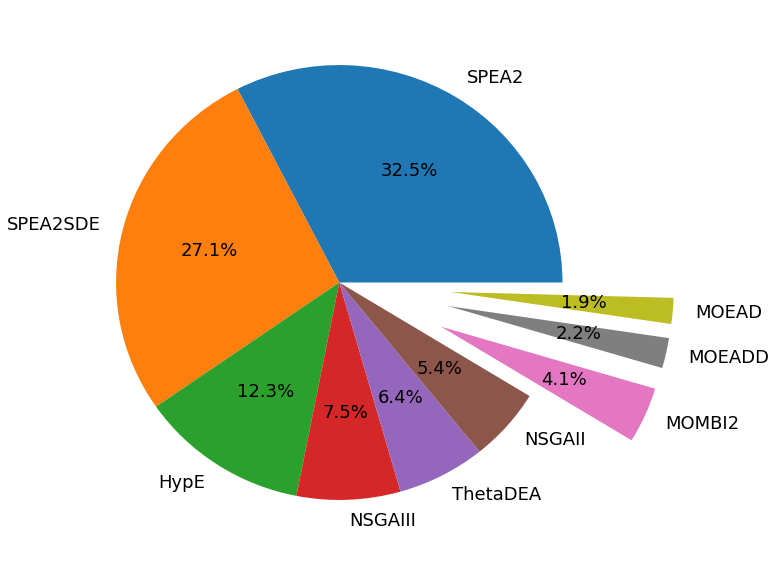

In [2]:
    
# summary
df = summary.groupby(['Selected']).mean().reset_index()

# df.plot.pie(y='cumcount', labels=df['Selected'], autopct='%1.1f%%', explode=(1, 1, 1, 1, 0, 0, 0, 0, 0))

df = df.sort_values(['cumcount'], ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(df['cumcount'], 
        labels=df['Selected'], 
        autopct='%1.1f%%', 
        textprops={'fontsize': 18}, 
        explode=(0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5))
plt.show()

In [3]:

df.cumsum()


,Selected,it,count,countnorm,cumcount
6,SPEA2,2452.8,0.646667,0.000753333,0.325338
7,SPEA2SPEA2SDE,4905.51,1.25444,0.00145132,0.596712
0,SPEA2SPEA2SDEHypE,7354.58,1.67778,0.00189877,0.719219
5,SPEA2SPEA2SDEHypENSGAIII,9803.2,2.01333,0.00230226,0.794265
8,SPEA2SPEA2SDEHypENSGAIIIThetaDEA,12252.3,2.32222,0.00267658,0.858172
4,SPEA2SPEA2SDEHypENSGAIIIThetaDEANSGAII,14695.9,2.62333,0.00300514,0.912547
3,SPEA2SPEA2SDEHypENSGAIIIThetaDEANSGAIIMOMBI2,17134.5,2.91444,0.00334982,0.954008
2,SPEA2SPEA2SDEHypENSGAIIIThetaDEANSGAIIMOMBI2MO...,19564.7,3.18556,0.00369244,0.976457
1,SPEA2SPEA2SDEHypENSGAIIIThetaDEANSGAIIMOMBI2MO...,21998.8,3.49222,0.00406261,0.995713
